<a href="https://colab.research.google.com/github/AlineBarrucci26/Analise_consumo_Cerveja/blob/main/Consumo_cerveja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando bibliotecas necesarias
# importando o matplotlib.pyplot
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# importando o pandas
import pandas as pd

# importando o numpy
import numpy as np

# importando o seaborn
import seaborn as sns


# importando a função que nos ajudará a separar os dados
from sklearn.model_selection import train_test_split

# importando LinearRegression da biblioteca scikit-learn
from sklearn.linear_model import LinearRegression

# importando as métricas que vai estimar 
# o quanto o nosso modelo tá bom ou não
from sklearn import metrics

In [ ]:
# Lendo o arquivo de dados
df = pd.read_csv('Consumo_cerveja.csv')

In [ ]:
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [ ]:
#Qual o tamanho do data-set
df.shape

(941, 7)

In [ ]:
#informações sobre o data-set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [ ]:
#Excluindo dados nulos
df = df.dropna(axis=0)

print("O dataset válido possui")
print("Linhas:", df.shape[0])
print("Colunas:", df.shape[1])

O dataset válido possui
Linhas: 365
Colunas: 7


In [ ]:
#As colunas de 1 a 4 possuem os decimais representados por "," e precisam ser torcados por "."
colunas =['Temperatura Media (C)', 'Temperatura Minima (C)' ,
            'Temperatura Maxima (C)', 'Precipitacao (mm)']

for coluna in colunas:
    df[coluna] = df[coluna].apply(lambda x: np.float(re.sub(r',','.',x)))

<ipython-input-90-88d39d5d9eb8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna] = df[coluna].apply(lambda x: np.float(re.sub(r',','.',x)))


In [ ]:
#Estatisticas descritivas
df.describe()  

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


# Matriz de correlação
Essa matriz no permite identificar a correlação das variáveis que compõe o dataset. Nela, temos os valores que correspondem ao coeficiente de correlação.
-Associação negativa: enquanto uma variável "sobe" a outra "desce".
-Associação positiva: quando uma variável "sobe" a outra também "sobe".

In [ ]:
df.corr()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
Temperatura Media (C),1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
Temperatura Minima (C),0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
Temperatura Maxima (C),0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
Precipitacao (mm),0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
Final de Semana,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
Consumo de cerveja (litros),0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


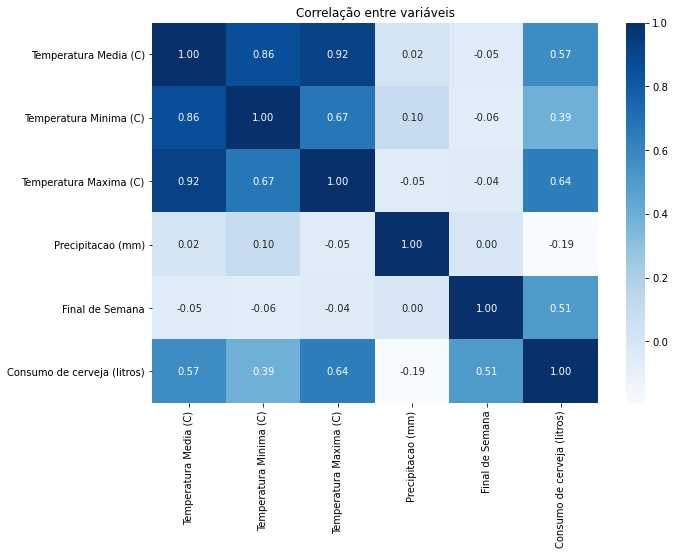

In [ ]:

plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis')
plt.show()


In [ ]:
# Analise da Variavel Dependente

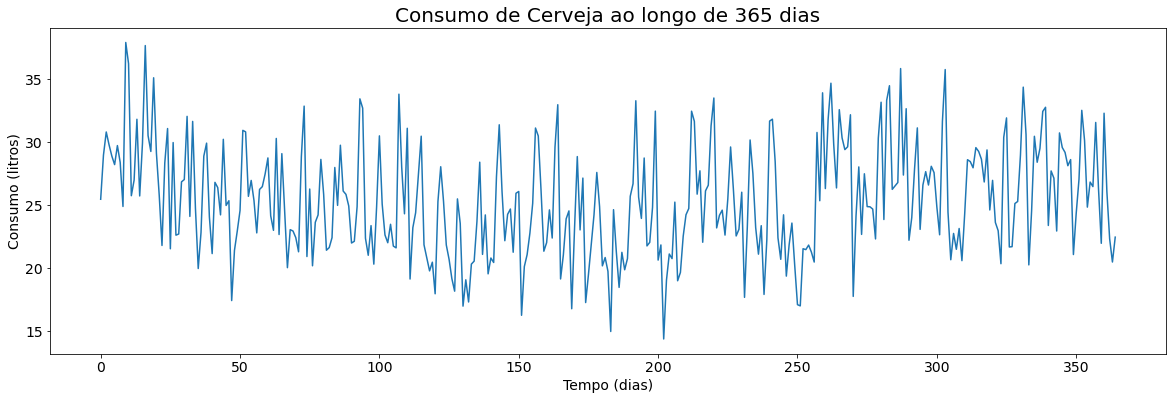

In [ ]:
# chamando a função subplots; cria uma figura e permite que você 
# insira gráficos dentro dessa figura
fig, ax = plt.subplots(figsize=(20,6))
# adicionando um título ao nosso gráfico
ax.set_title('Consumo de Cerveja ao longo de 365 dias', fontsize=20)
# identificando os eixos
ax.set_ylabel('Consumo (litros)', fontsize=14)
ax.set_xlabel('Tempo (dias)', fontsize=14)
# plotando o nosso gráfico; o parâmetro fontsize vai definir o tamanho 
# da fonte da gradação dos eixos
ax = df['Consumo de cerveja (litros)'].plot(fontsize=14)

# Análise de gráficos de dispersão (Variável Dependente x Variáveis Explicativas)

Utilizando o pairplot, queremos analisar a variável consumo para vermos as correlações dela com as variáveis explicativas. Além disso, o gráfico de dispersão nos permite identificar se duas variáveis apresentam uma relação linear entre elas e a direção dessa relação. 

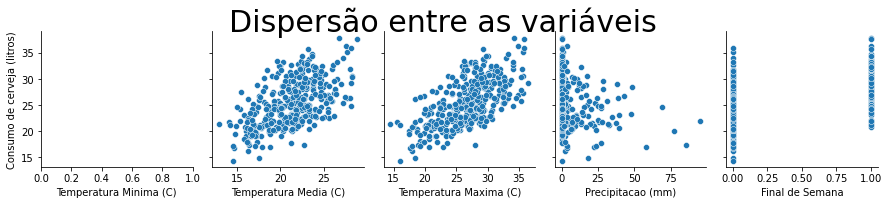

In [ ]:
# podemos definir uma lista de variáveis para que 
# seja feita a correlação
ax = sns.pairplot(df, y_vars='Consumo de cerveja (litros)', x_vars=['Temperatura Minima (C)', 'Temperatura Media (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana'])
# incluindo o título
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=30, y=1.1)
ax

Observações:
A relação do consumo com as variaveis de temperatura é mais concentrada na variavel de temperatura maxima.

A relação de consumo com a chuva (precipitação) é uma correlaçao negativa, pois vemos que quanto mais chuva menos consumo e vice- versa;
A relação de consumo x final de semana, há consumo quando é final e semana e quando não é, mas a maior consumo quando é final de semana em litros;


# Estimando um modelo de Regressão Linear para o consumo
Nosso objetivo é prever quanto será o consumo de cerveja em litros - dado as informações de temperatura maxima, valores da chuva e se é final de semana ou não.

A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável dependente) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas. 

In [ ]:
# criando uma Series (pandas) para armazenar 
# o consumo de cerveja (y)
y = df['Consumo de cerveja (litros)']

In [ ]:
# criando um DataFrame (pandas) para armazenar 
# as variáveis explicativas (X)
X = df[['Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana']]

In [ ]:
# test_size é o tamanho que se quer utilizar do dataset ; 
# pega registros de forma aleatória
# random_state é a semente do nosso aleatório
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [ ]:
# observando quanto registros foram alocados para treino
X_train.shape

(255, 3)

In [ ]:
# observando quanto registros foram alocados para teste
X_test.shape


(110, 3)

In [ ]:
# vamos chamar de 'modelo', pois é o modelo que estamos estimando
modelo = LinearRegression()

In [ ]:
# utilizamos o método fit() para estimar o modelo
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

Metricas para verificar se o modelo ficou bom ou ruim

Para isso, podemos calcular o coeficiente de determinação (R²) que é uma medida resumida que diz quanto a reta de regressão ajusta-se aos dados.

In [ ]:
# queremos o score (R²) do modelo que estimamos 
# anteriormente com a função fit
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.73


Observando o resultado podemos dizer que o nosso modelo é capaz de ajustar-se ou seja acertar 73% dos dados.

In [ ]:
# vamos prever os valores baseados nos valores de X_test
y_previsto = modelo.predict(X_test)

In [ ]:
# agora vamos comparar o previsto com o de teste (real)
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.69


Agora verificando o resultado dos valores previstos pelo modelo temos que nosso modelo tem uma assertividade de 69% ao que queremos calcular - O quanto será o consumo de cerveja dados os valores de chuva, temperatura maxima e final de semana ou não.

In [ ]:
Vamos verificar como fica a equação da reta de regressão linear aplicado no nosso modelo

In [ ]:
# para vermos o valor do intercepto, fazemos
modelo.intercept_

5.951976339312441

In [ ]:
# observando os valores do coeficientes angulares 
# [coeficiente de 'Temperatura Maxima (C)',
# coeficiente de 'Precipitacao (mm)', coeficiente de 'Final de Semana'],
# respectivamente
modelo.coef_

array([ 0.68473676, -0.06078244,  5.40108334])

Temos que:
Intercepto = 5.9519
Temperatura maxima = 684.7367
Chuva = -60.7824
Final de Semana = 5401.0833

O que siginifica é:

Sem nenhuma das variaveis explicativas o consumo de cerveja médio seria de 5.9519

Mantendo-se os valores de 'Precipitacao (mm)' e 'Final de Semana' constantes, e o acrescimo de 1º na temperatura maxima gera uma variação media no consumo de cerveja de 684,73 litros

Mantendo-se os valores de 'Temperatura Maxima (C)' e 'Final de Semana' constantes, e o acrescimo de 1mm de chuva gera uma variação média no consumo de cerveja de -60,78 litros.

Mantendo-se os valores de 'Temperatura Maxima (C)' e Precipitacao (mm)' constantes, o fato de ser final de semana ou não gera uma variação media de 5401 litros no consumo de cerveja.